In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import random
import librosa as lb

Part 1

a) We will program our robot to move according to a Markov chain. There are 11 distinct positions,
corresponding to x = 0, 1, 2,…, 10 meters along a track. When the robot is in position x = 1, 2, …, 9, the
robot will remain in the same position at the next time step with probability 0.8, move to the left at the
next time step with probability 0.1, and move to the right at the next time step with probability 0.1. For
positions x = 0 and x=10, the robot will remain in the current position at the next time step with
probability 0.9 and move away from the boundary at the next time step with probability 0.1. Create the
state transition matrix A and print out its values.

In [4]:
A = 0.8*np.eye(11) + 0.1*np.triu(np.tril(np.ones(11), -1),-1) + 0.1*np.triu(np.tril(np.ones(11), 1),1)
A[0,0] += 0.1
A[-1,-1] += 0.1
A

array([[0.9, 0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.1, 0.8, 0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.1, 0.8, 0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.1, 0.8, 0.1, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.1, 0.8, 0.1, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.1, 0.8, 0.1, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.1, 0.8, 0.1, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0.8, 0.1, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0.8, 0.1, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0.8, 0.1],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0.9]])

b)  Given that the robot starts at position x=5 at time step t=0, simulate the robot’s position over 50
(discrete) time steps. Repeat the simulation 10 times and plot the 10 trajectories in a figure.

In [5]:
def positionSimulator(startingState, numSims, numSteps):
    pos = np.zeros((numSims, numSteps))
    pos[:,0] = startingState
    for i in range(1,numSteps):
        chances = np.random.rand(1,numSims)
        pos[:,i] = pos[:,i-1] - (chances < 0.1) + (chances >= 0.9)
        pos[:,i] = ((pos[:,i] > 0) * pos[:,i]) - (pos[:,i] > 10)
    return pos

In [6]:
def plotSteps(pos):
    plt.rcParams["figure.figsize"] = [7.50, 3.50]
    plt.rcParams["figure.autolayout"] = True
    
    plt.plot(pos.T)
    plt.title("Robot Steps Over Time")
    plt.show()

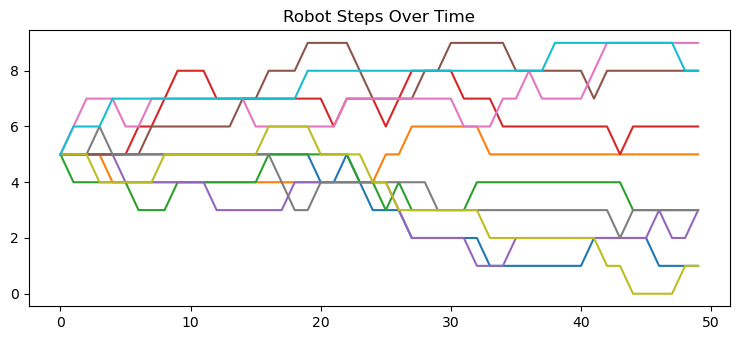

In [7]:
testSteps = positionSimulator(5, 10, 50)
plotSteps(testSteps)

In [8]:
# Define a PMF that acts as the "initial state", indicating that our robot begins at position 5
init_pmf = np.array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
testPMF = [init_pmf @ np.linalg.matrix_power(A, 1), init_pmf @ np.linalg.matrix_power(A, 2), init_pmf @ np.linalg.matrix_power(A, 3)]

In [9]:
def plotPMFs(listPMF):
    xk = np.arange(0, 11)
    pk1, pk2, pk3 = listPMF[0], listPMF[1], listPMF[2]
    
    custm_1 = stats.rv_discrete(name='custm_1', values=(xk, pk1))
    custm_2 = stats.rv_discrete(name='custm_2', values=(xk, pk2))
    custm_3 = stats.rv_discrete(name='custm_3', values=(xk, pk3))

    
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15, 6))
    
    ax1.plot(xk, custm_1.pmf(xk), 'ro', ms=12, mec='r')
    ax1.vlines(xk, 0, custm_1.pmf(xk), colors='r', lw=4)
    ax1.title.set_text('PMF at t=1')
    ax1.set_xlabel('Robot State')

    
    ax2.plot(xk, custm_2.pmf(xk), 'ro', ms=12, mec='r')
    ax2.vlines(xk, 0, custm_2.pmf(xk), colors='r', lw=4)
    ax2.title.set_text('PMF at t=2')
    ax2.set_xlabel('Robot State')
    
    ax3.plot(xk, custm_3.pmf(xk), 'ro', ms=12, mec='r')
    ax3.vlines(xk, 0, custm_3.pmf(xk), colors='r', lw=4)
    ax3.title.set_text('PMF at t=3')
    ax3.set_xlabel('Robot State')
    
    plt.subplots_adjust(wspace=0.5) 
    plt.show()

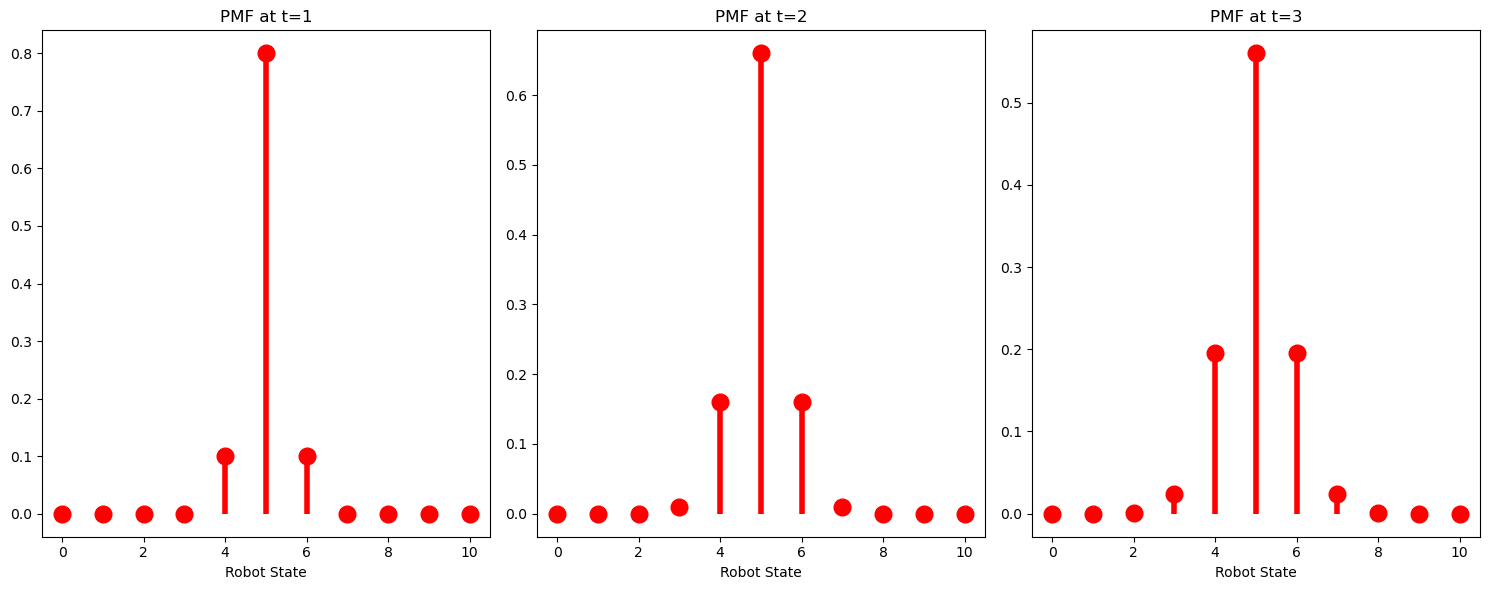

In [10]:
plotPMFs(testPMF)

In [86]:
def findUniform(init_pmf, A, threshold, shape, dimension):
    numSteps = 0
    while True:
        numSteps += 1
        outPMF = init_pmf @ np.linalg.matrix_power(A, numSteps)
        max, min = np.max(outPMF), np.min(outPMF)
        if max - min < threshold:
            if dimension == 1:
                plt.stem(outPMF)
                plt.title(f'PMF at t={numSteps}')
                plt.xlabel('Robot State')
            else:
                plt.imshow(outPMF.reshape(shape, shape))
                plt.title(f'2D PMF at t={numSteps}')
                plt.xlabel('Robot State')
                
            return outPMF

array([0.09043326, 0.09058433, 0.09083851, 0.0911151 , 0.09132628, 0.09140501, 0.09132628, 0.0911151 , 0.09083851, 0.09058433, 0.09043326])

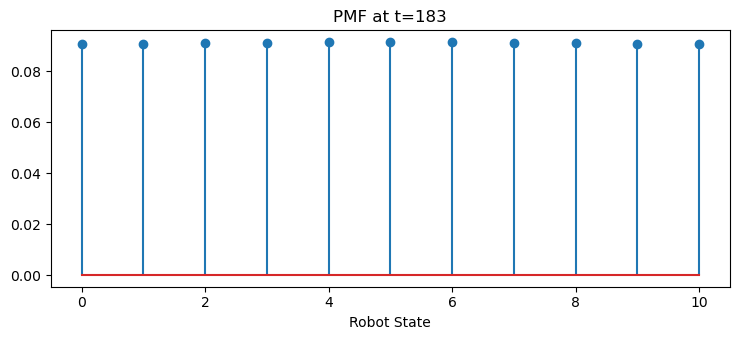

In [242]:
findUniform(init_pmf, A, 0.001, 11, 1)

In [243]:
xt = testSteps[0,:]

In [244]:
noise_levels = [0.4, 1, 2]

In [245]:
nt_1 = np.random.normal(0, noise_levels[0], 50)
nt_2 = np.random.normal(0, noise_levels[1], 50)
nt_3 = np.random.normal(0, noise_levels[2], 50)

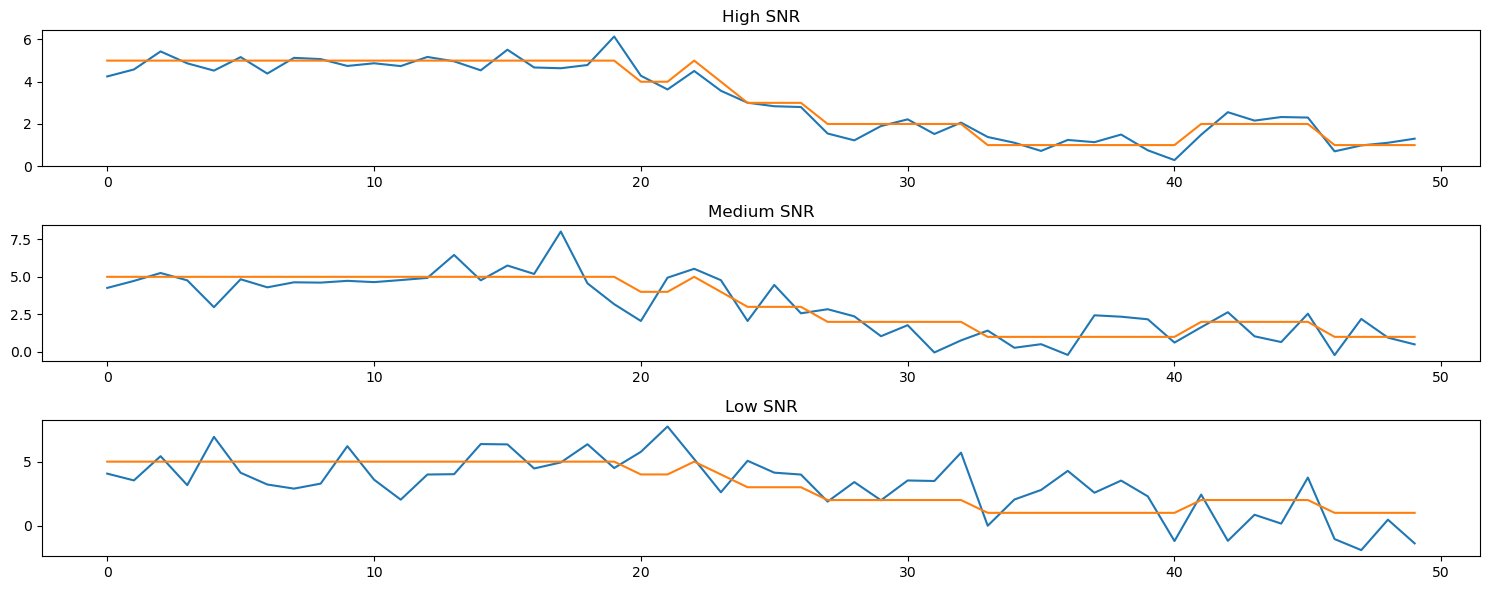

In [263]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 6))

ax1.plot(xt + nt_1)
ax1.title.set_text('High SNR')
ax1.plot(xt)

ax2.plot(xt + nt_2)
ax2.title.set_text('Medium SNR')
ax2.plot(xt)

ax3.plot(xt + nt_3)
ax3.title.set_text('Low SNR')
ax3.plot(xt)

plt.show()

In [247]:
def createProbDensityMatrix(observations, n):
    ProbDensityMatrix = np.zeros((11, len(observations)))
    for i in range(11):
        rv = stats.norm(i, n)
        ProbDensityMatrix[i, :] = rv.pdf(observations)
    return ProbDensityMatrix

In [248]:
def plotViterbi(A, observations, n, init_pmf, xt):
    fig, ax = plt.subplots(3, 1, figsize=(15, 6))
    for i in range(3):
        densityMatrix = createProbDensityMatrix(observations[i], n[i])
        viterbi = lb.sequence.viterbi(densityMatrix, A, p_init=init_pmf)
        plt.subplot((311+i))
        plt.plot(viterbi, 'ro')
        plt.title(f"Viterbi Prediction for n = {n[i]}")
        plt.plot(xt, 'b-')
        
    plt.show()

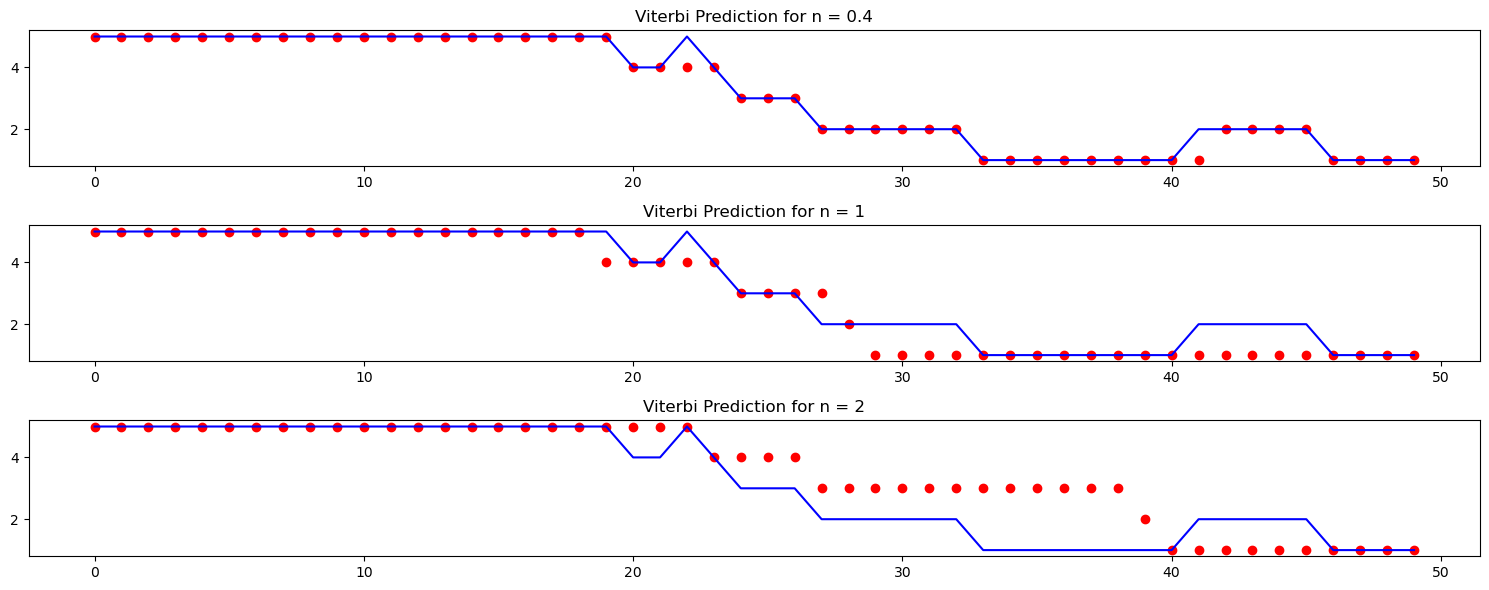

In [249]:
plotViterbi(A, [xt + nt_1, xt + nt_2, xt + nt_3], noise_levels, init_pmf, xt)

# Small noise is making us get errors?

In [251]:
def SNRaccuracy(A, n, init_pmf, xt):
    accuracies = np.zeros(len(n))
    for i in range(len(n)):
        observations = xt+np.random.normal(0, n[i], len(xt))
        densityMatrix = createProbDensityMatrix(observations, n[i])
        viterbi = lb.sequence.viterbi(densityMatrix, A, p_init=init_pmf)
        accuracies[i] = np.sum((np.asarray(viterbi)-np.asarray(xt))==0)/len(observations)
    plt.title("Noise Variance Accuracy")
    plt.plot(n, accuracies)
        

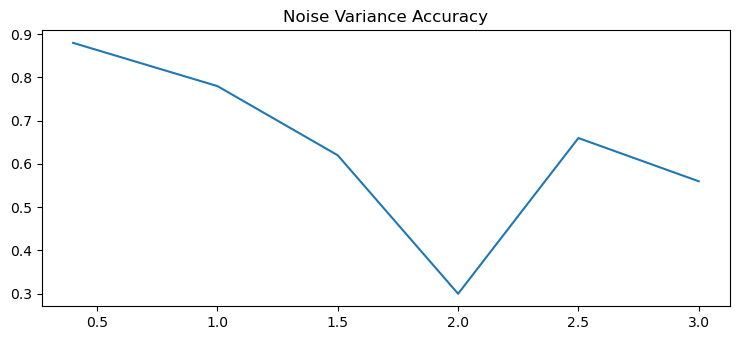

In [252]:
SNRaccuracy(A, [0.4, 1, 1.5, 2, 2.5, 3], init_pmf, xt)

# PART 2

a) Create the state transition matrix A as well as a mapping between the state index and the position in
2D space

In [22]:
def createTransMatrix(numStates, chances):
    A = np.zeros((numStates**2, numStates**2))
    for i in range(numStates):
        for j in range(numStates):
            if i % (numStates - 1) == 0 and j % (numStates - 1) == 0 and i == j:
                A[i*numStates:numStates*(i + 1), j*numStates:(j+1)*numStates] = probMat(chances[0]+chances[1], chances[1], chances[1], size=numStates)
            elif abs(i-j) == 1:
                A[i*numStates:numStates*(i + 1), j*numStates:(j+1)*numStates] = probMat(chances[1], 0, 0, size=numStates)
            elif i == j:
                A[i*numStates:numStates*(i + 1), j*numStates:(j+1)*numStates] = probMat(chances[0], chances[1], chances[1], size=numStates)
    return A

In [23]:
def probMat(same, more, less, center=0, size=11):
    probMat = same*np.eye(size)
    for i in range(size):
        if i == 0:
            probMat[i, i] = same+more
            probMat[i, i+1] = less
        elif i - int(size/2) < center:
            probMat[i,i+1] = less
            probMat[i,i-1] = more
        elif i - int(size/2) == center:
            probMat[i,i+1] = (less+more)/2
            probMat[i,i-1] = (less+more)/2
        elif i == size-1:
            probMat[i, i] = same+more
            probMat[i, i-1] = less
        else:
            probMat[i,i+1] = more
            probMat[i,i-1] = less
    return probMat

In [71]:
np.set_printoptions(threshold=np.inf, linewidth=np.inf)
transMatrix2D = createTransMatrix(11, [0.8, 0.05])
print(transMatrix2D)

[[0.9  0.05 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.05 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.05 0.85 0.05 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.05 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   

b) Given that the robot starts at position (5,5) at time step t=0, simulate the robot’s position over 50
(discrete) time steps. Repeat the simulation 5 times and plot the five different trajectories in a figure

In [38]:
def positionSimulator2D(startingState, numSims, numSteps):
    pos = np.zeros((numSims, numSteps, 2))
    pos[:,0, :] = startingState
    pmf = stats.rv_discrete(values=(np.arange(-2, 3), [0.05, 0.05, 0.8, 0.05, 0.05]))
    
    for i in range(numSims):
        for j in range(1,numSteps):
            step = pmf.rvs()
            pos[i, j] = pos[i, j - 1]
            match step:
                case -2:
                    pos[i, j, 1] -= (1 and (pos[i, j, 1] != 0))
                case -1:
                    pos[i, j, 0] -= (1 and (pos[i, j, 0] != 0))
                case 1:
                    pos[i, j, 0] += (1 and (pos[i, j, 0] != 10))
                case 2:
                    pos[i, j, 1] += (1 and (pos[i, j, 1] != 10))
                case default:
                    pass
            
    return pos

In [67]:
def plotSteps(pos):
    plt.rcParams["figure.figsize"] = [7.50, 3.50]
    plt.rcParams["figure.autolayout"] = True
    
    for i in range(np.shape(pos)[0]):
        x = pos[i,:,0]
        y = pos[i,:,1]
        plt.plot(x,y)
    plt.title("Robot Trajectories in 2D")
    plt.show()

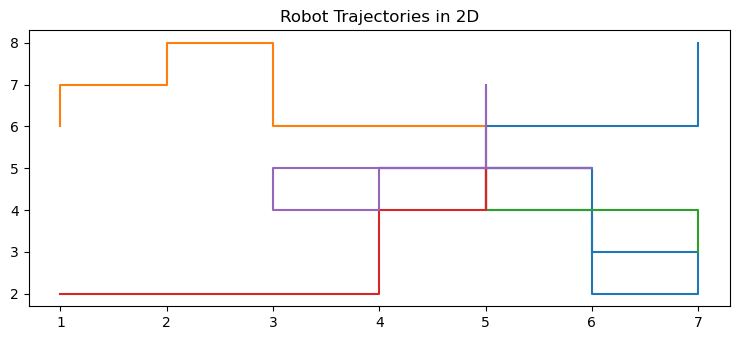

In [68]:
pos = positionSimulator2D(5, 5, 50)
plotSteps(pos)

c) Given that the robot starts at position (5,5) at time step t=0, what is the pmf of the robot’s position at
time t=1? At t=5? At t=20? Show each pmf graphically in your jupyter notebook

In [253]:
init_pmf_2d = np.zeros(121,)
init_pmf_2d[60] = 1
listPMF = [init_pmf_2d @ np.linalg.matrix_power(transMatrix2D, i) for i in [1, 5, 20]]

In [82]:
def plotPMF2D(listPMF, states):
    xk = np.arange(0, states**2).reshape(states,states)
    pk1, pk2, pk3 = listPMF[0].reshape(states,states), listPMF[1].reshape(states,states), listPMF[2].reshape(states,states)
    
    custm_1 = stats.rv_discrete(name='custm_1', values=(xk, pk1))
    custm_2 = stats.rv_discrete(name='custm_2', values=(xk, pk2))
    custm_3 = stats.rv_discrete(name='custm_3', values=(xk, pk3))

    
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15, 6))
    
    ax1.imshow(custm_1.pmf(xk))
    ax1.title.set_text('2D PMF at t=1')
    ax1.set_xlabel('Robot State')

    
    ax2.imshow(custm_2.pmf(xk))
    ax2.title.set_text('2D PMF at t=5')
    ax2.set_xlabel('Robot State')
    
    ax3.imshow(custm_3.pmf(xk))
    ax3.title.set_text('2D PMF at t=20')
    ax3.set_xlabel('Robot State')
    
    plt.subplots_adjust(wspace=0.5) 
    plt.show()

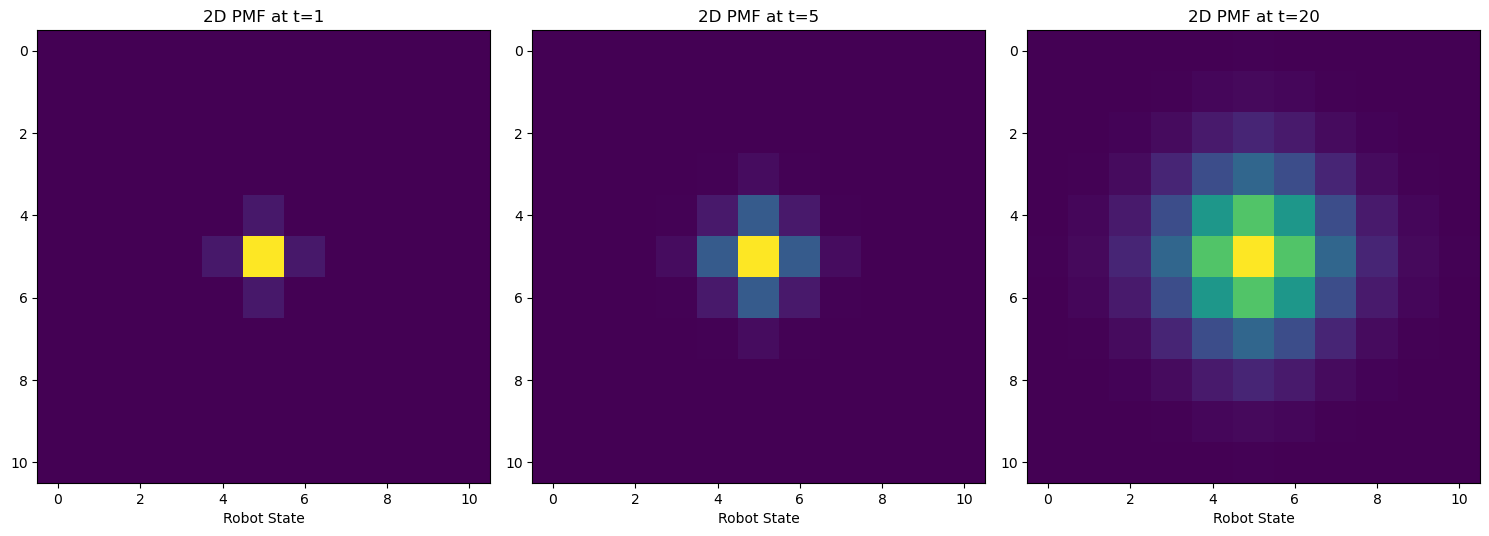

In [83]:
plotPMF2D(listPMF, 11)

d) Given that the robot starts at position (5,5) at time step t=0, at approximately what time step does
the pmf of the robot’s position reach a steady state distribution? Include plots to support your answer

By our graph below, our robot's position reaches a steady state distribution at t=405

array([0.00821592, 0.00822361, 0.00823656, 0.00825065, 0.00826141, 0.00826542, 0.00826141, 0.00825065, 0.00823656, 0.00822361, 0.00821592, 0.00822361, 0.00823132, 0.00824428, 0.00825838, 0.00826915, 0.00827316, 0.00826915, 0.00825838, 0.00824428, 0.00823132, 0.00822361, 0.00823656, 0.00824428, 0.00825725, 0.00827138, 0.00828216, 0.00828618, 0.00828216, 0.00827138, 0.00825725, 0.00824428, 0.00823656, 0.00825065, 0.00825838, 0.00827138, 0.00828552, 0.00829632, 0.00830035, 0.00829632, 0.00828552, 0.00827138, 0.00825838, 0.00825065, 0.00826141, 0.00826915, 0.00828216, 0.00829632, 0.00830713, 0.00831116, 0.00830713, 0.00829632, 0.00828216, 0.00826915, 0.00826141, 0.00826542, 0.00827316, 0.00828618, 0.00830035, 0.00831116, 0.0083152 , 0.00831116, 0.00830035, 0.00828618, 0.00827316, 0.00826542, 0.00826141, 0.00826915, 0.00828216, 0.00829632, 0.00830713, 0.00831116, 0.00830713, 0.00829632, 0.00828216, 0.00826915, 0.00826141, 0.00825065, 0.00825838, 0.00827138, 0.00828552, 0.00829632, 0.0083003

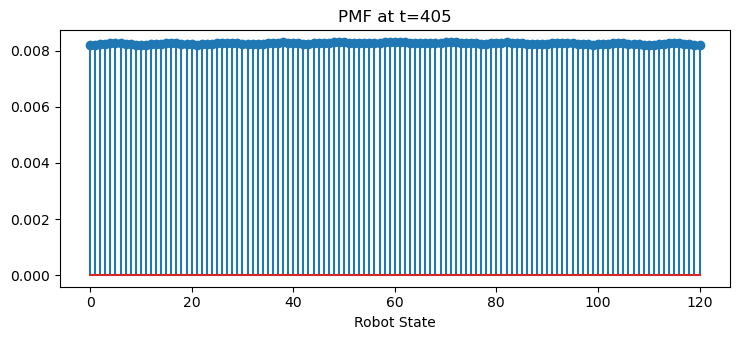

In [92]:
findUniform(init_pmf_2d, transMatrix2D, 0.0001, 11 ,1)

e) At each time step, we observe the robot’s position using lidar. The lidar provides a noisy estimate 𝑥"!
which can be modeled as the sum of the true position 𝑥! and a Gaussian random variable 𝑛! that has
mean [0, 0] and covariance matrix 𝜎" Ι (which is the same at all time steps). Assume that the noise 𝑛!
in each reading is independent of the true position and independent of the noise at other time
steps. Pick one of the robot trajectories that you simulated in part b, and overlay the observed lidar
measurements for three different settings of 𝜎"These three settings should correspond to low, medium, and high SNR scenarios

In [96]:
noise_2Dlevels = [0.5*np.eye(2), 1*np.eye(2), 2*np.eye(2)]

In [167]:
nt_1_2d = stats.multivariate_normal([0, 0], noise_2Dlevels[0])
nt_2_2d = stats.multivariate_normal([0, 0], noise_2Dlevels[1])
nt_3_2d = stats.multivariate_normal([0, 0], noise_2Dlevels[2])

In [255]:
xt_2d = pos[4, :]
xt_1_2d = nt_1_2d.rvs(50) + pos[4, :]
xt_2_2d = nt_2_2d.rvs(50) + pos[4, :]
xt_3_2d = nt_3_2d.rvs(50) + pos[4, :]

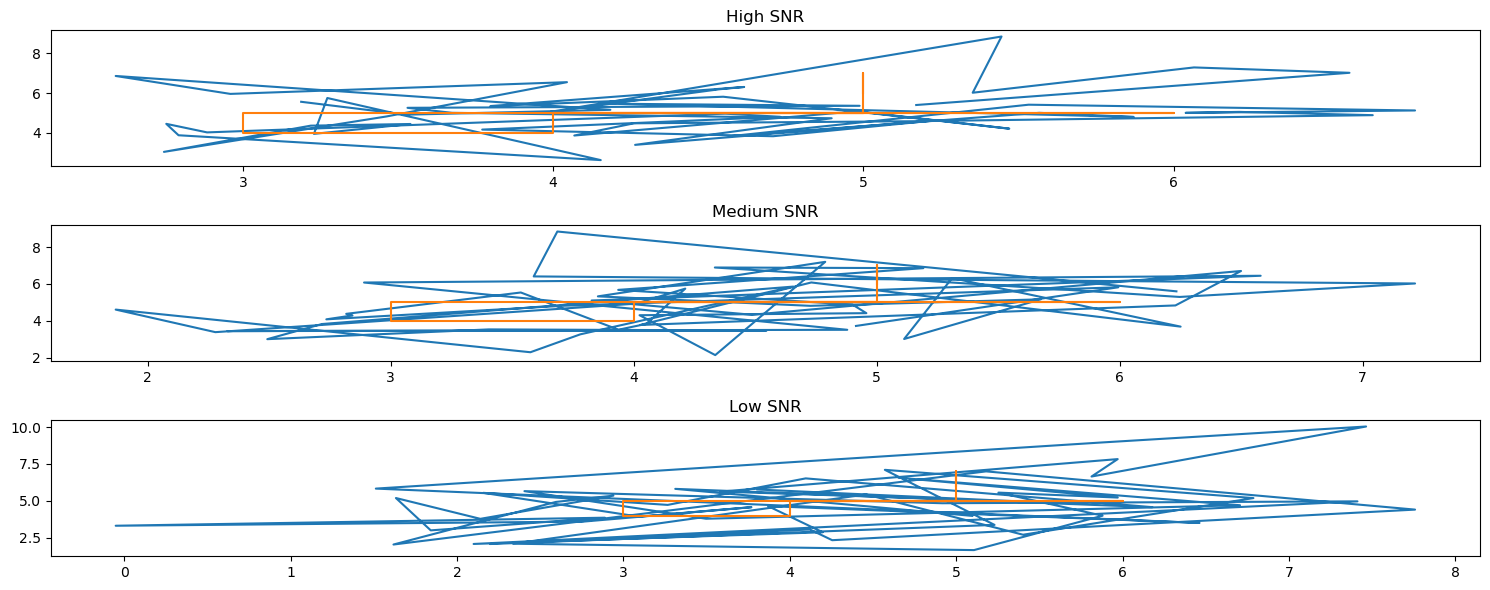

In [262]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 6))

ax1.plot(xt_1_2d[:,0], xt_1_2d[:,1])
ax1.title.set_text('High SNR')
ax1.plot(xt_2d[:,0], xt_2d[:,1])

ax2.plot(xt_2_2d[:,0], xt_2_2d[:,1])
ax2.title.set_text('Medium SNR')
ax2.plot(xt_2d[:,0], xt_2d[:,1])

ax3.plot(xt_3_2d[:,0], xt_3_2d[:,1])
ax3.title.set_text('Low SNR')
ax3.plot(xt_2d[:,0], xt_2d[:,1])

plt.show()

f) We would like to estimate the robot’s (discrete) position over time based on the lidar readings at each
time step. You may use librosa’s librosa.sequence.viterbi() function for this part. Note that you will
need to pass in a matrix of observation probability densities, the state transition matrix, and the
probability distribution of the initial robot position. Plot the ground truth robot position over time as a
blue trajectory and overlay the Viterbi estimates of the robot position as red circles. Generate three
such plots for the three different SNR scenarios

In [169]:
def createProbDensityMatrix2D(observations, n):
    ProbDensityMatrix = np.zeros((11, 11, len(observations)))
    for i in range(11):
        for j in range(11):
            rv = stats.multivariate_normal([i, j], n)
            ProbDensityMatrix[i, j, :] = rv.pdf(observations)
            
    return ProbDensityMatrix.reshape(121, len(observations))

In [179]:
def plotViterbi2D(A, observations, n, init_pmf_2d, xt):
    fig, ax = plt.subplots(3, 1, figsize=(15, 10))
    predictions = np.zeros((3, 121, 50))
    for i in range(3):
        densityMatrix = createProbDensityMatrix2D(observations[i], n[i])
        viterbi = lb.sequence.viterbi(densityMatrix, A, p_init=init_pmf_2d)
        viterbi_2d = np.array([viterbi//11, viterbi%11]).T
        plt.subplot((311+i))
        plt.plot(xt[:,0], xt[:,1], 'b-')
        plt.plot(viterbi_2d[:,0], viterbi_2d[:,1], 'r--')
        plt.title(f'Viterbi Prediction at n = {n[i]}')
        predictions[i] = viterbi.T
    plt.show()
    return predictions

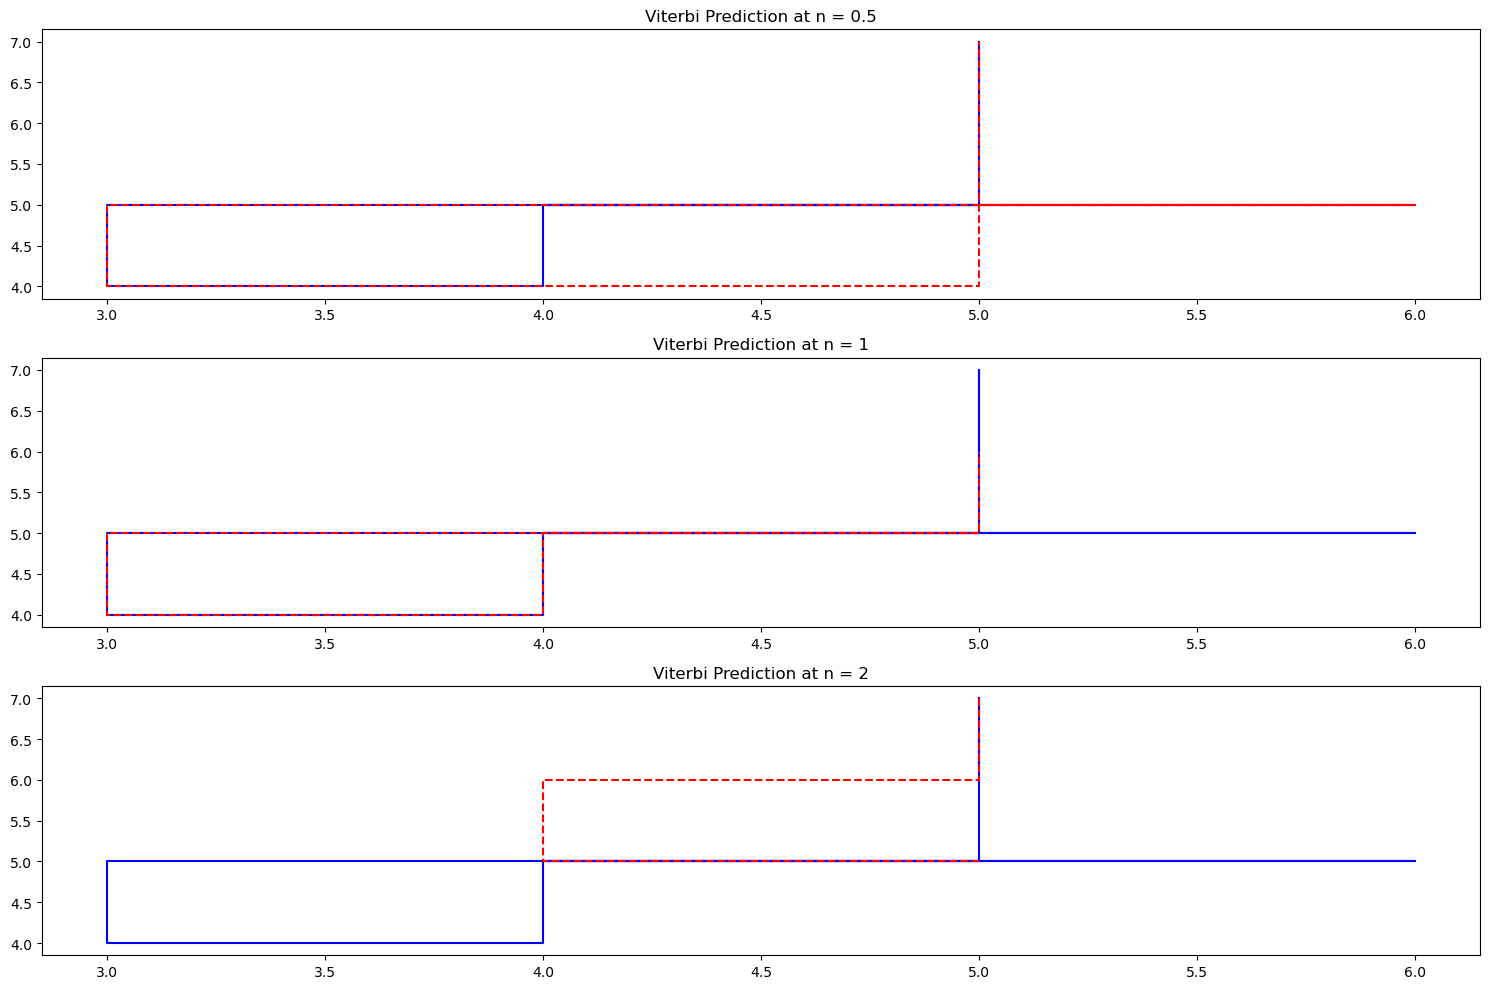

(50,)

In [254]:
predictions = plotViterbi2D(transMatrix2D, [xt_1_2d, xt_2_2d, xt_3_2d], [0.5, 1, 2], init_pmf_2d, xt_2d)
xt.shape

g) Run the above simulation for a range of 𝜎" settings. For each setting, calculate the percentage of
time steps in which the robot position is estimated correctly by the Viterbi algorithm. Generate a plot
that shows how location prediction accuracy varies with 𝜎" . Make sure your plot is clearly labeled.


In [237]:
def SNRaccuracy2D(A, n, init_pmf, xt):
    accuracies = np.zeros(len(n))
    for i in range(len(n)):
        nt = stats.multivariate_normal([0, 0], n[i])
        observations = xt+nt.rvs(len(xt))
        densityMatrix = createProbDensityMatrix2D(observations, n[i])
        viterbi = lb.sequence.viterbi(densityMatrix, A, p_init=init_pmf)
        viterbi_2d = np.array([viterbi//11, viterbi%11]).T
        accuracies[i] = np.sum(np.sum(np.abs(viterbi_2d-xt)==0,1)==2)/len(observations)
    plt.title("Noise Variance Accuracy in 2D")
    plt.plot(n, accuracies)

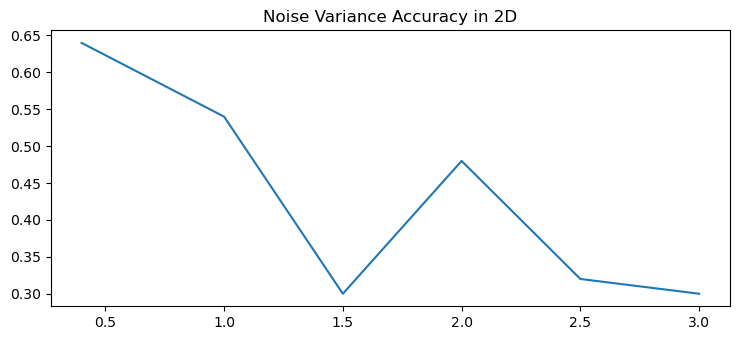

In [238]:
SNRaccuracy2D(transMatrix2D, [0.4, 1, 1.5, 2, 2.5, 3], init_pmf_2d, xt_2d)